In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Chava\Desktop\Resume\Blinkit-sales\data\blinkit_sales.csv")

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [17]:
df.isna().sum().sort_values(ascending=False)
df.duplicated().sum()
df.nunique().sort_values()




Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Fat_Content                5
Outlet_Establishment_Year       9
Outlet_Identifier              10
Item_Type                      16
Item_Weight                   410
Item_Identifier              1543
Item_MRP                     4402
Item_Visibility              5277
dtype: int64

In [27]:

df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"
})


In [32]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].median())
df["Outlet_Size"] = df["Outlet_Size"].fillna("Medium")   # default value



In [34]:

df = df[df["Item_MRP"] > 0]   # no free products


In [36]:
# Price Bands
bins = [0, 50, 100, 150, 200, 500]
labels = ["0-50", "50-100", "100-150", "150-200", "200+"]
df["Price_Band"] = pd.cut(df["Item_MRP"], bins=bins, labels=labels)

# Visibility Bands
df["Visibility_Band"] = pd.qcut(df["Item_Visibility"], 5, labels=["Very Low","Low","Medium","High","Very High"])


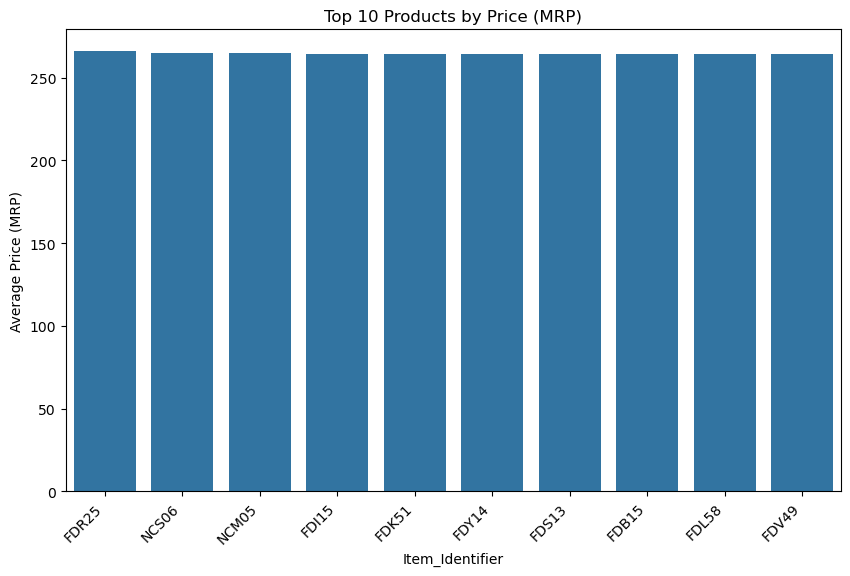

In [38]:
top10_items = df.groupby("Item_Identifier")["Item_MRP"].mean().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10_items.index, y=top10_items.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Products by Price (MRP)")
plt.ylabel("Average Price (MRP)")
plt.show()


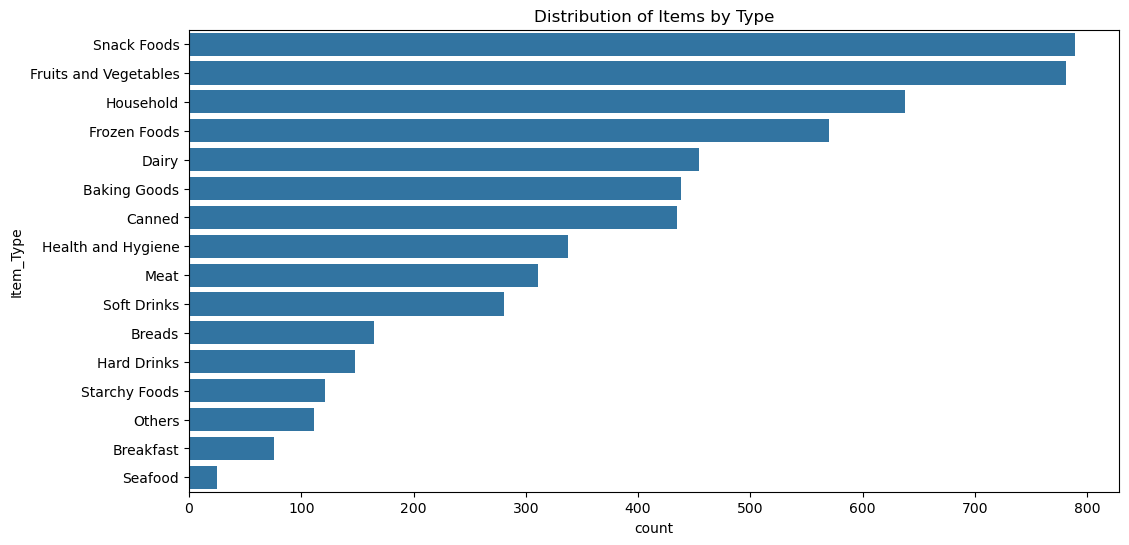

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(y="Item_Type", data=df, order=df["Item_Type"].value_counts().index)
plt.title("Distribution of Items by Type")
plt.show()


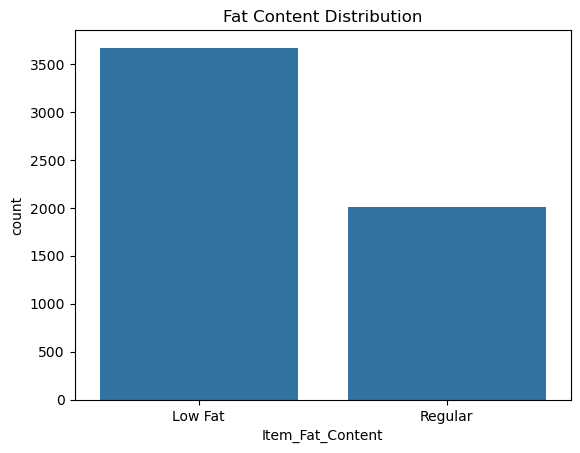

In [42]:
sns.countplot(x="Item_Fat_Content", data=df)
plt.title("Fat Content Distribution")
plt.show()


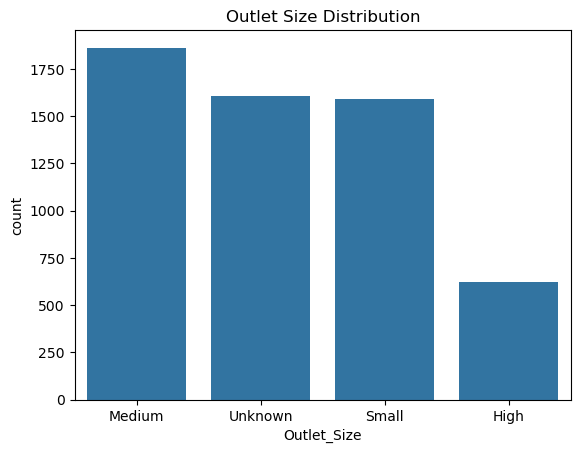

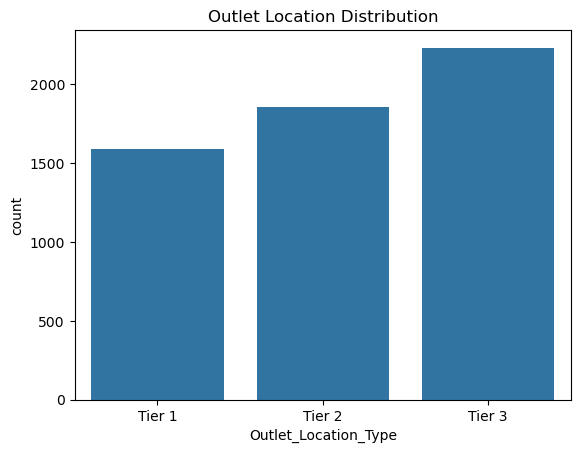

In [44]:
sns.countplot(x="Outlet_Size", data=df)
plt.title("Outlet Size Distribution")
plt.show()

sns.countplot(x="Outlet_Location_Type", data=df)
plt.title("Outlet Location Distribution")
plt.show()


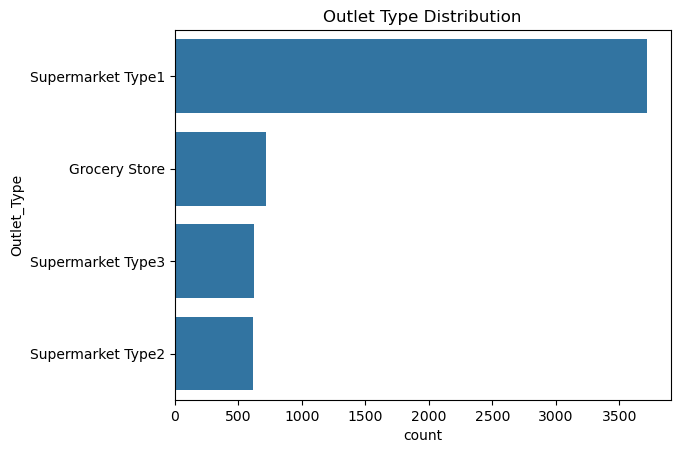

In [46]:
sns.countplot(y="Outlet_Type", data=df)
plt.title("Outlet Type Distribution")
plt.show()


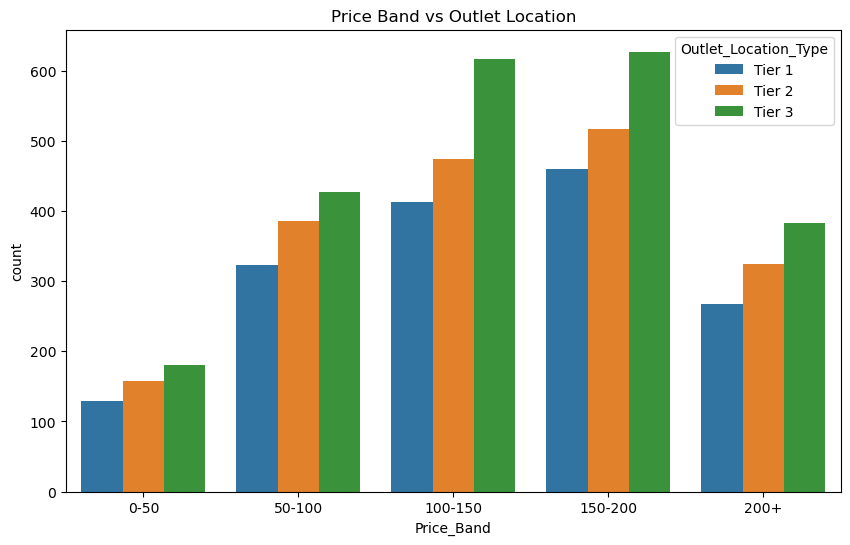

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x="Price_Band", hue="Outlet_Location_Type", data=df)
plt.title("Price Band vs Outlet Location")
plt.show()


In [ ]:
#Step 7: Insights (MBA Style)

#Examples (you will refine with actual numbers):

###Product Insights

#“High-priced items (MRP > 200) are rare but concentrated in Frozen Foods & Health Products → premium category opportunity.”

#“Snack Foods & Fruits/Vegetables dominate product variety.”

#Outlet Insights

#“Tier 3 outlets have the highest count of budget products (MRP < 100) → strong price-sensitive demand.”

#“Supermarket Type 1 is the most common outlet type → Blinkit relies heavily on small-format stores.”

#Visibility Insights

#“High visibility items are mostly low-fat snack foods → Blinkit prioritizes fast-moving SKUs.”#

In [50]:
df.to_excel("blinkit_cleaned.xlsx", index=False)
